

# Módulo 4 - Big Data
Tarea 3
Estudiante: Jairo Prado

### Descripción de los datos 

Descripción de los datos: 

Se seleccionó el dataset Diabetes Prediction el cual posee aproximadamente 100 mil registros con perfiles de pacientes. Con este dataset se desea predecir si un perfil de paciente fue diagnosticado con diabetes o no

Incluye múltiples variables de entrada o características que incluyen diferentes ámbitos. Incluye características biológicas como género y edad, características sociales como el nivel de educación y la empleabilidad, hábitos como el consumo del alcohol y actividad física semanal, historial familiar de enfermedades,  y finalmente mediciones corporales como los niveles de insulina

La variable de predicción a utilizar es diagnosed_diabetes

Link del dataset https://www.kaggle.com/code/chitranshusinha/diabetes-prediction/input


# Lectura y limpieza

In [1]:
# Cargar el conjunto de datos completo
import findspark
findspark.init('/usr/lib/python3.7/site-packages/pyspark')

from pyspark.sql.types import (StringType, IntegerType, FloatType, 
                               DecimalType, StructField, StructType, DoubleType)

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Basic JDBC pipeline") \
    .config("spark.driver.extraClassPath", "postgresql-42.2.14.jar") \
    .config("spark.executor.extraClassPath", "postgresql-42.2.14.jar") \
    .getOrCreate()

diabetes_df = spark \
    .read \
    .format("csv") \
    .option("path", "diabetes_dataset.csv") \
    .option("header", True) \
    .schema(StructType([
                StructField("age", IntegerType()),
                StructField("gender", StringType()),
                StructField("ethnicity", StringType()),
                StructField("education_level", StringType()),
                StructField("income_level", StringType()),
                StructField("employment_status", StringType()),
                StructField("smoking_status", StringType()),
                StructField("alcohol_consumption_per_week",  IntegerType()),
                StructField("physical_activity_minutes_per_week", IntegerType()),
                StructField("diet_score", DoubleType()),
                StructField("sleep_hours_per_day", DoubleType()),
                StructField("screen_time_hours_per_day", DoubleType()),
                StructField("family_history_diabetes", IntegerType()),
                StructField("hypertension_history", IntegerType()),
                StructField("cardiovascular_history", IntegerType()),
                StructField("bmi", DoubleType()),
                StructField("waist_to_hip_ratio", DoubleType()),
                StructField("systolic_bp", IntegerType()),
                StructField("diastolic_bp", IntegerType()),
                StructField("heart_rate", IntegerType()),
                StructField("cholesterol_total", IntegerType()),
                StructField("hdl_cholesterol", IntegerType()),
                StructField("ldl_cholesterol", IntegerType()),
                StructField("triglycerides", IntegerType()),
                StructField("glucose_fasting", IntegerType()),
                StructField("glucose_postprandial", IntegerType()),
                StructField("insulin_level", DoubleType()),
                StructField("hba1c", DoubleType()),
                StructField("diabetes_risk_score", DoubleType()),
                StructField("diabetes_stage", StringType()),
                StructField("diagnosed_diabetes", IntegerType())])) \
    .load()

#diabetes_df.printSchema()
diabetes_df.show()

ps: unrecognized option: p
BusyBox v1.30.1 (2019-10-26 11:23:07 UTC) multi-call binary.

Usage: ps [-o COL1,COL2=HEADER]

Show list of processes

	-o COL1,COL2=HEADER	Select columns for display
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/01 20:36:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/usr/lib/python3.7/site-packages/pyspark/context.py:317: FutureWarning: Python 3.7 support is deprecated in Spark 3.4.
  warnings.warn("Python 3.7 support is deprecated in Spark 3.4.", FutureWarning)
25/11/01 20:36:57 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---+------+---------+---------------+------------+-----------------+--------------+----------------------------+----------------------------------+----------+-------------------+-------------------------+-----------------------+--------------------+----------------------+----+------------------+-----------+------------+----------+-----------------+---------------+---------------+-------------+---------------+--------------------+-------------+-----+-------------------+--------------+------------------+
|age|gender|ethnicity|education_level|income_level|employment_status|smoking_status|alcohol_consumption_per_week|physical_activity_minutes_per_week|diet_score|sleep_hours_per_day|screen_time_hours_per_day|family_history_diabetes|hypertension_history|cardiovascular_history| bmi|waist_to_hip_ratio|systolic_bp|diastolic_bp|heart_rate|cholesterol_total|hdl_cholesterol|ldl_cholesterol|triglycerides|glucose_fasting|glucose_postprandial|insulin_level|hba1c|diabetes_risk_score|diabetes_stage|di

In [2]:
# Seleccionar un subconjunto de las columnas de interés y el objectivo que es el precio
columns_kept = ['age','gender','ethnicity','education_level','income_level','employment_status','smoking_status','alcohol_consumption_per_week','physical_activity_minutes_per_week','diet_score','sleep_hours_per_day','screen_time_hours_per_day','family_history_diabetes','hypertension_history','cardiovascular_history','bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp','heart_rate','cholesterol_total','hdl_cholesterol','ldl_cholesterol','triglycerides','glucose_fasting','glucose_postprandial','insulin_level','hba1c']

target = ['diagnosed_diabetes']

selected_columns_df = diabetes_df.select(columns_kept)

selected_columns_df.show()

+---+------+---------+---------------+------------+-----------------+--------------+----------------------------+----------------------------------+----------+-------------------+-------------------------+-----------------------+--------------------+----------------------+----+------------------+-----------+------------+----------+-----------------+---------------+---------------+-------------+---------------+--------------------+-------------+-----+
|age|gender|ethnicity|education_level|income_level|employment_status|smoking_status|alcohol_consumption_per_week|physical_activity_minutes_per_week|diet_score|sleep_hours_per_day|screen_time_hours_per_day|family_history_diabetes|hypertension_history|cardiovascular_history| bmi|waist_to_hip_ratio|systolic_bp|diastolic_bp|heart_rate|cholesterol_total|hdl_cholesterol|ldl_cholesterol|triglycerides|glucose_fasting|glucose_postprandial|insulin_level|hba1c|
+---+------+---------+---------------+------------+-----------------+--------------+------

In [3]:
# Analisys de nulos.
from pyspark.sql.functions import col, sum as _sum, when

cols = ['age','gender','ethnicity','smoking_status','alcohol_consumption_per_week',
        'physical_activity_minutes_per_week','diet_score','sleep_hours_per_day',
        'screen_time_hours_per_day','family_history_diabetes','hypertension_history',
        'cardiovascular_history','bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp',
        'heart_rate','cholesterol_total','hdl_cholesterol','ldl_cholesterol','triglycerides',
        'glucose_fasting','glucose_postprandial','insulin_level','hba1c','diagnosed_diabetes']

#  null counts
null_counts_row = diabetes_df.select([
    _sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in cols
]).collect()[0].asDict()

# mostrar
print("\n Cuenta de nulos por columna:\n")
for col_name, count in sorted(null_counts_row.items(), key=lambda x: x[1], reverse=True):
    print(f"{col_name:40s} {count}")



 Cuenta de nulos por columna:

age                                      0
gender                                   0
ethnicity                                0
smoking_status                           0
alcohol_consumption_per_week             0
physical_activity_minutes_per_week       0
diet_score                               0
sleep_hours_per_day                      0
screen_time_hours_per_day                0
family_history_diabetes                  0
hypertension_history                     0
cardiovascular_history                   0
bmi                                      0
waist_to_hip_ratio                       0
systolic_bp                              0
diastolic_bp                             0
heart_rate                               0
cholesterol_total                        0
hdl_cholesterol                          0
ldl_cholesterol                          0
triglycerides                            0
glucose_fasting                          0
glucose_postprandial  

In [4]:
# Analisis de duplicados 

duplicates = diabetes_df.groupBy(cols) \
               .count() \
               .filter(col("count") > 1)

# Just show how many duplicate rows exist
num_duplicate_rows = duplicates.count()

print(f"Numero de filas duplicadas {num_duplicate_rows}")



Numero de filas duplicadas 0


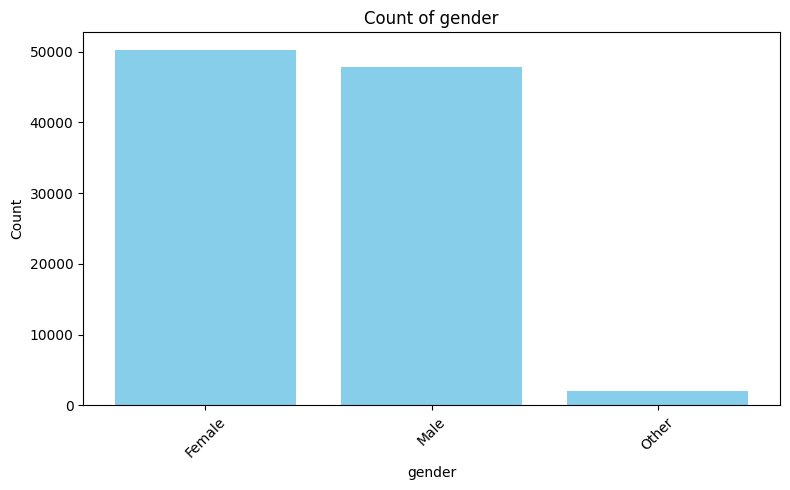

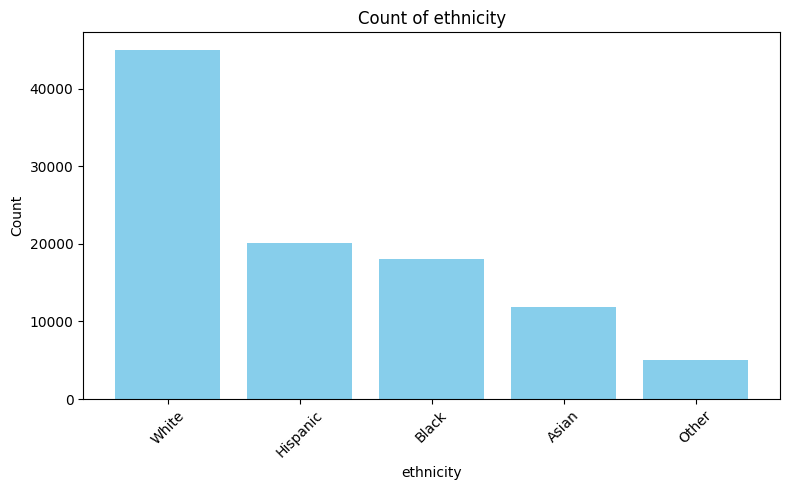

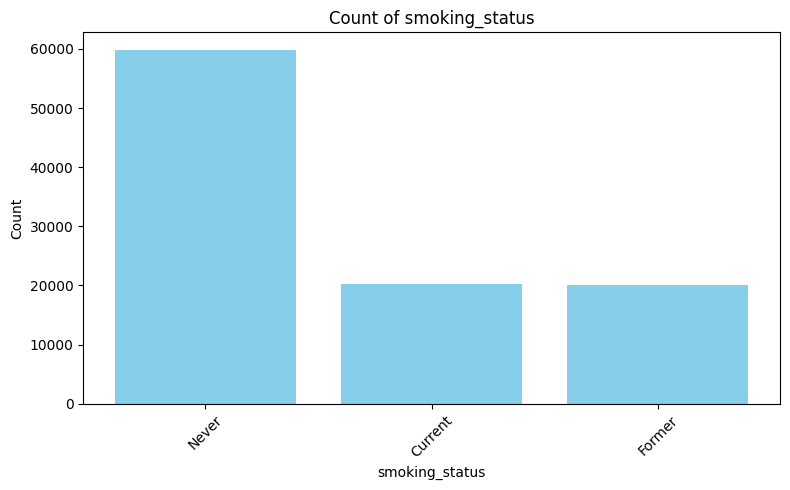

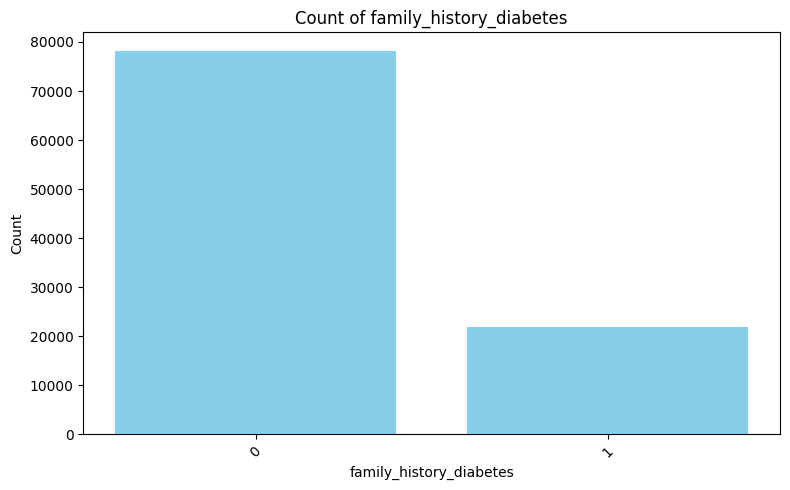

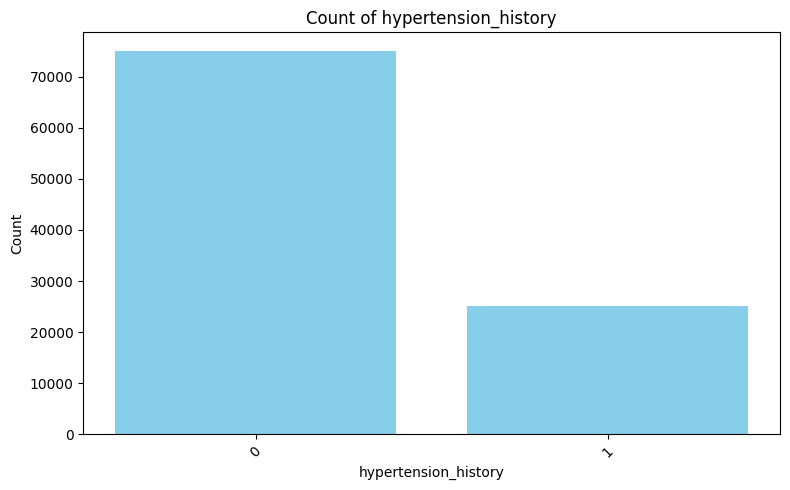

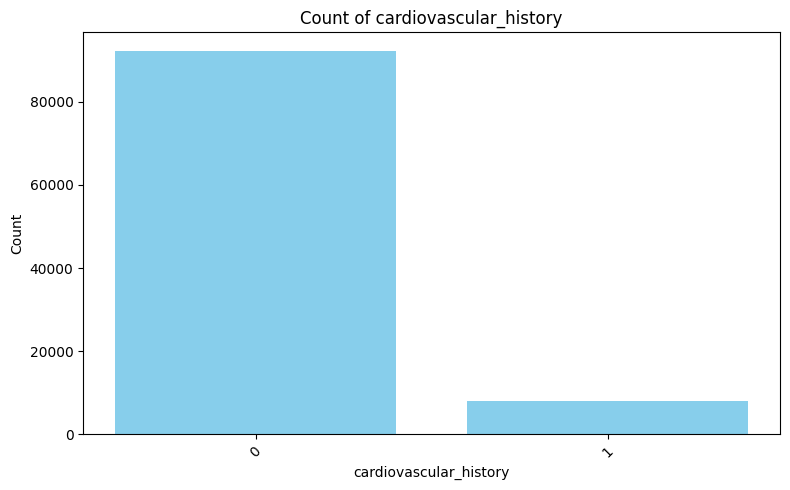

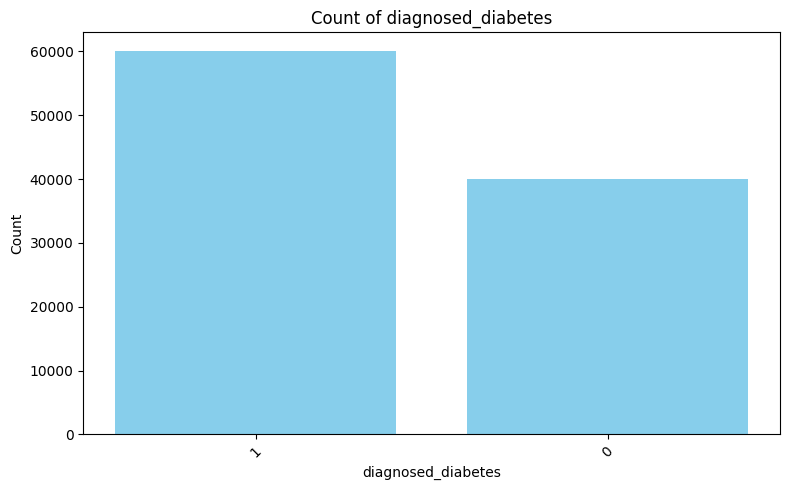

In [5]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import numpy as np

categorical_cols = ["gender", "ethnicity", "smoking_status", "family_history_diabetes",
                    "hypertension_history", "cardiovascular_history", "diagnosed_diabetes"]

for col in categorical_cols:
    counts = diabetes_df.groupBy(col).count().orderBy('count', ascending=False).toPandas()
    
    # Crear x positiones en rango  range(len(categories))
    x_pos = np.arange(len(counts[col]))
    
    plt.figure(figsize=(8,5))
    plt.bar(x_pos, counts['count'], color='skyblue')
    
    # añadir el las etiquetas del eje x y rotar 
    plt.xticks(x_pos, counts[col], rotation=45)
    
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()  # Ajustar distribucion  para evitar corte de etiqutas
    plt.show()


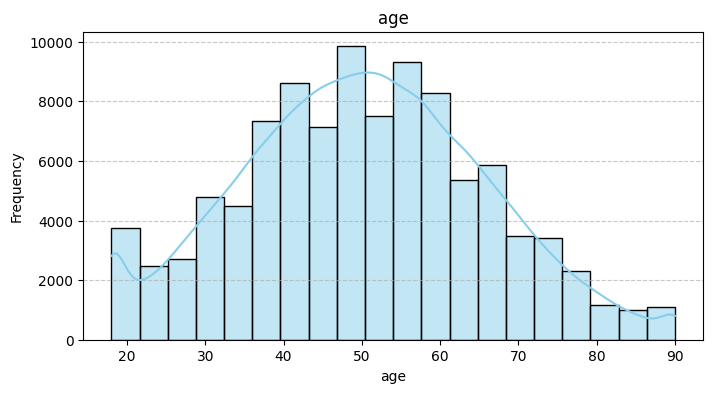

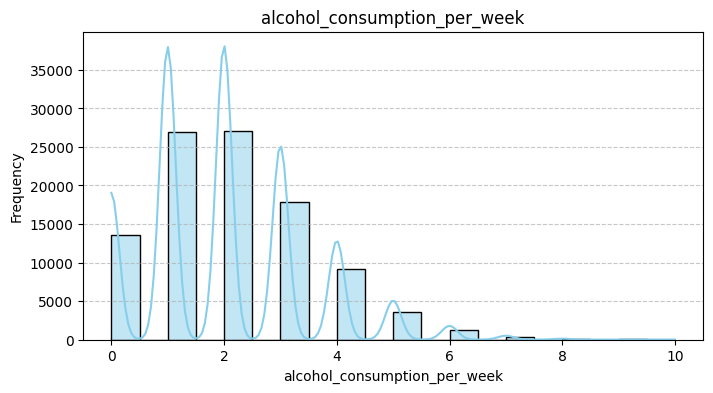

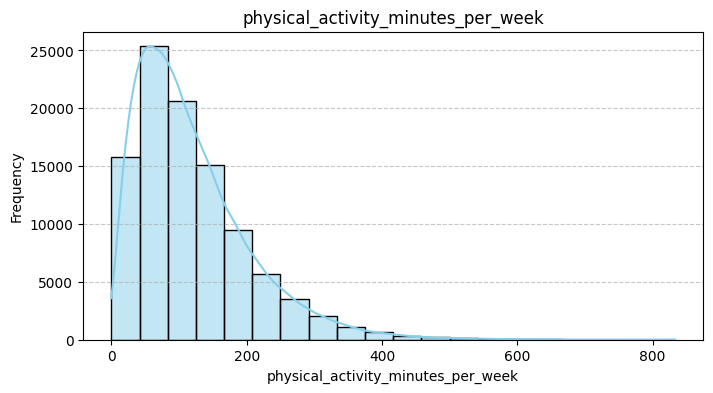

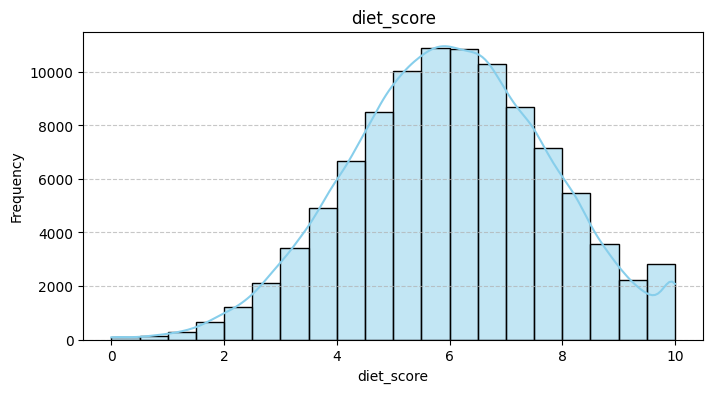

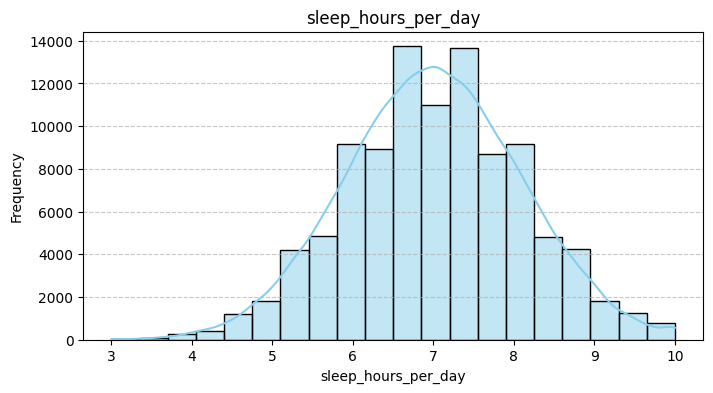

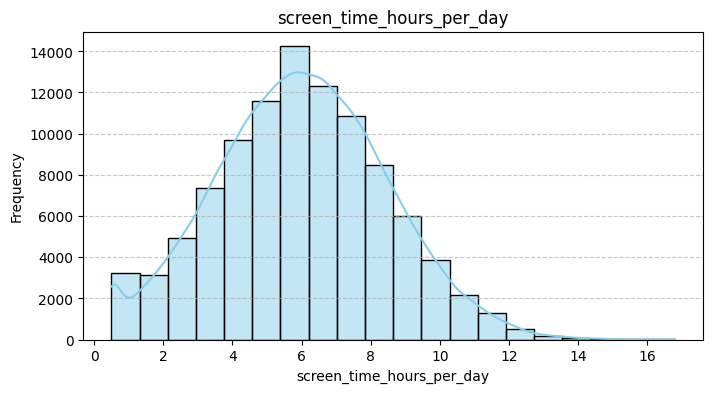

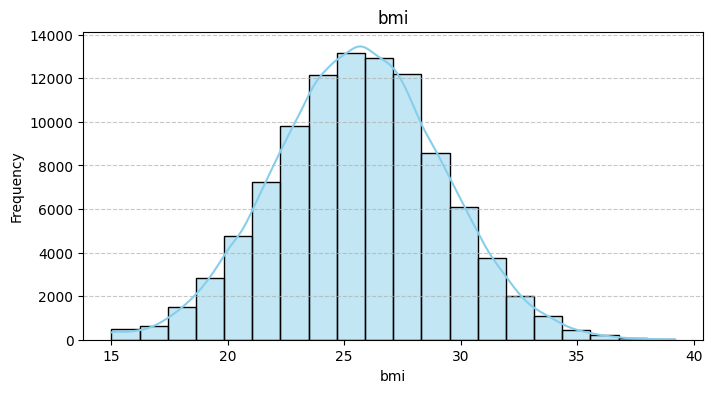

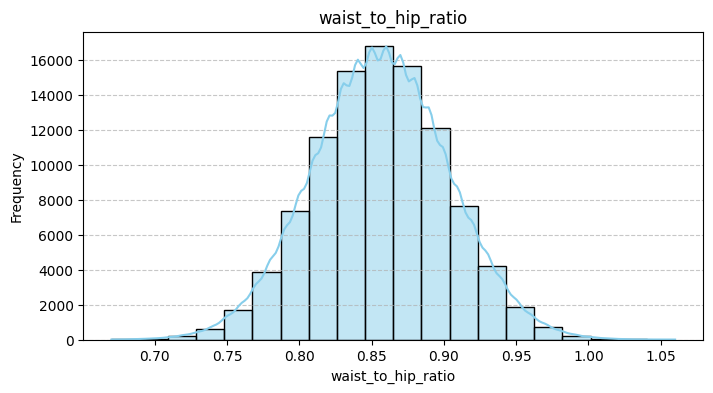

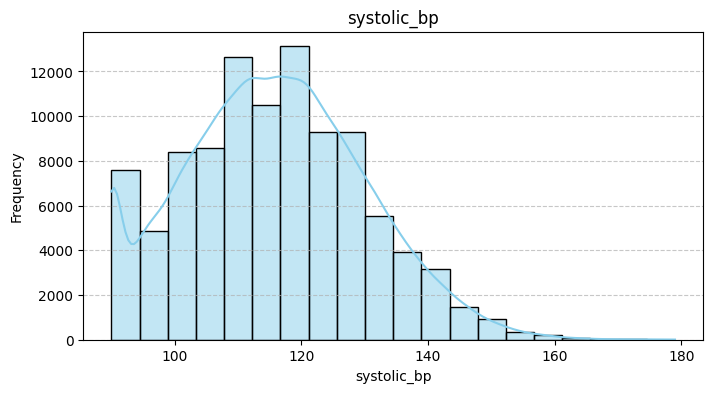

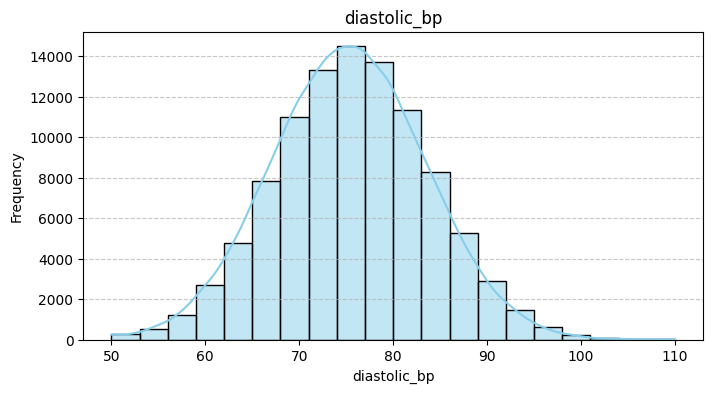

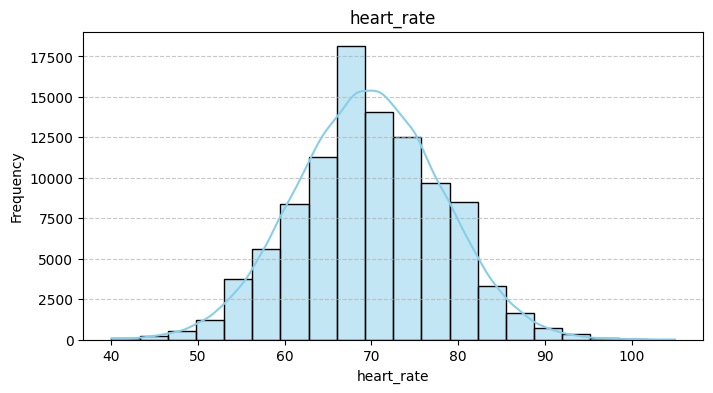

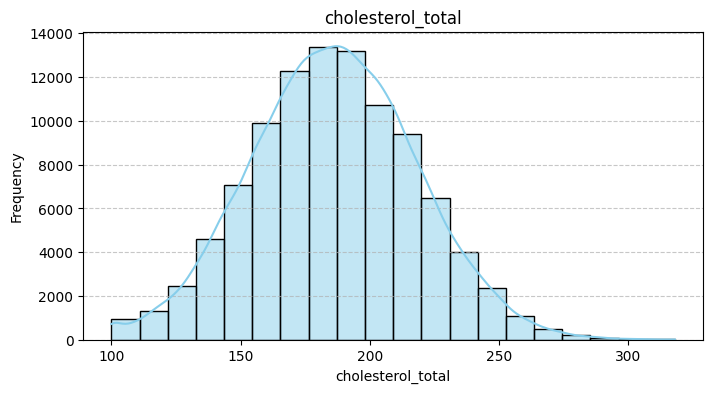

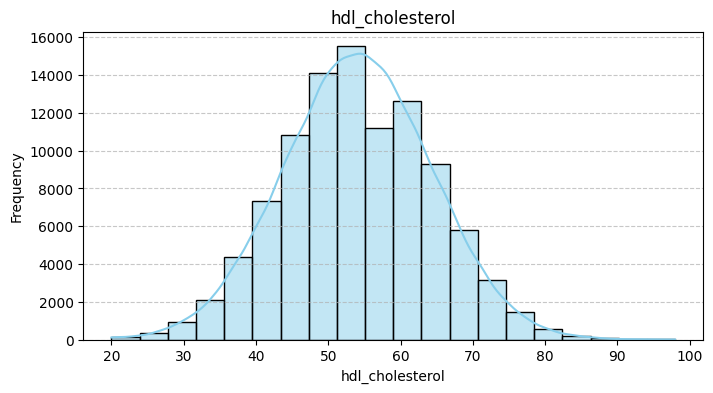

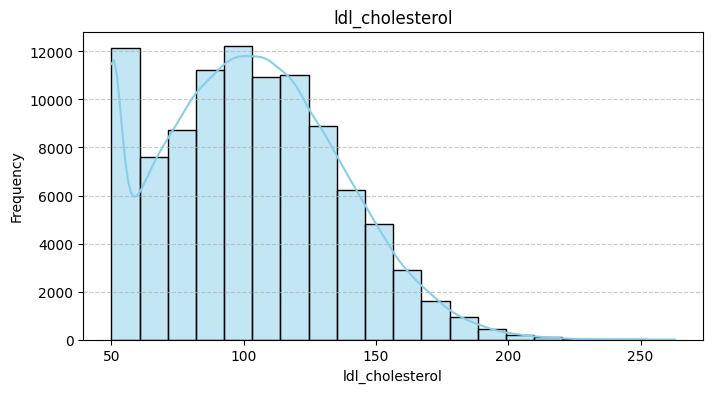

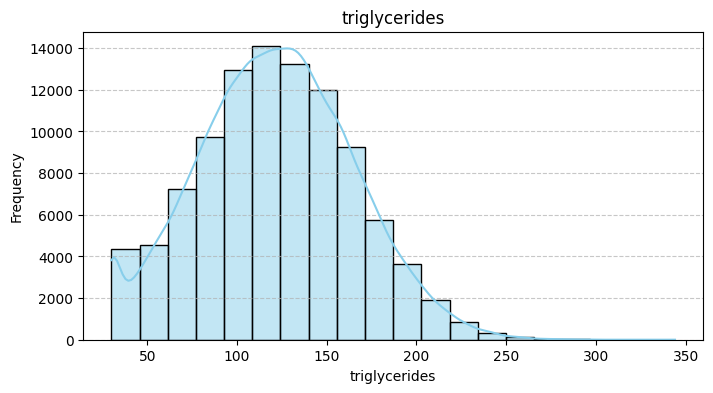

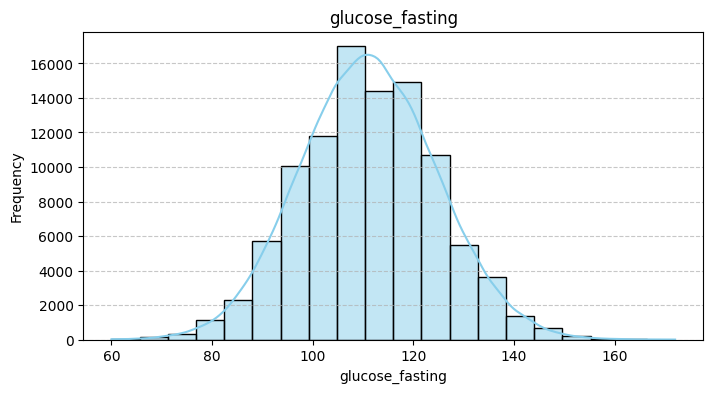

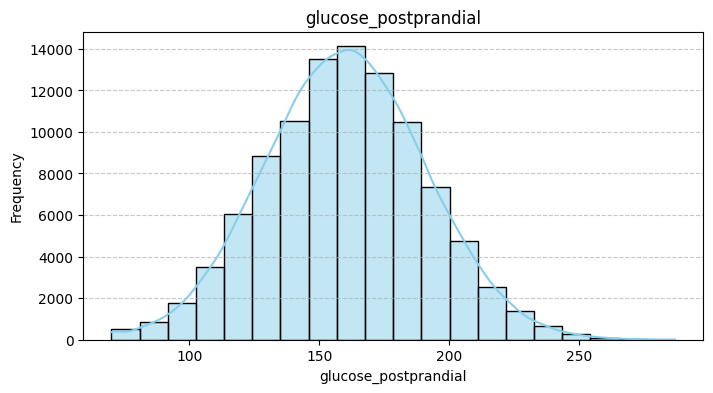

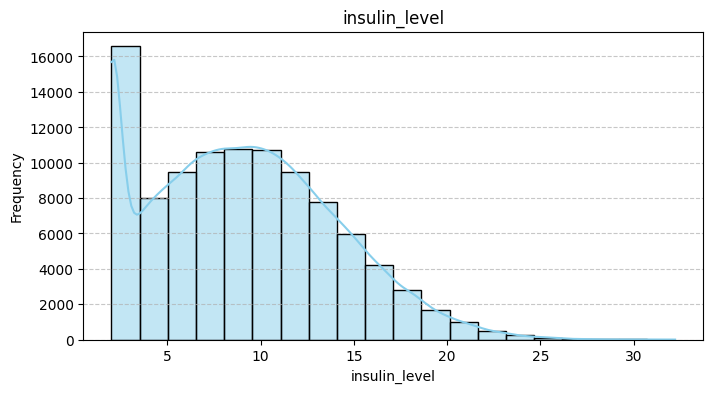

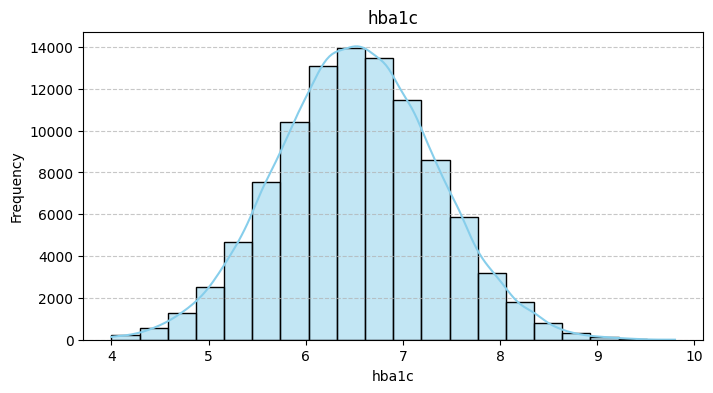

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['age','alcohol_consumption_per_week','physical_activity_minutes_per_week',
        'diet_score','sleep_hours_per_day','screen_time_hours_per_day',
        'bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp','heart_rate',
        'cholesterol_total','hdl_cholesterol','ldl_cholesterol','triglycerides',
        'glucose_fasting','glucose_postprandial','insulin_level','hba1c']

for col in cols:
    data = diabetes_df.select(col).toPandas()[col]
    
    plt.figure(figsize=(8,4))
    sns.histplot(data, bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [7]:
#Convertir a categoricas a numericas 
from pyspark.ml.feature import StringIndexer

categorical_cols = ["gender", "ethnicity", "smoking_status"]

for col in categorical_cols:
    indexer = StringIndexer(inputCol=col, outputCol=col + "_num")
    diabetes_df = indexer.fit(diabetes_df).transform(diabetes_df)


In [8]:

cols_num=["gender_num", "ethnicity_num", "smoking_status_num",'alcohol_consumption_per_week','physical_activity_minutes_per_week','diet_score','sleep_hours_per_day','screen_time_hours_per_day','family_history_diabetes','hypertension_history','cardiovascular_history','bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp','heart_rate','cholesterol_total','hdl_cholesterol','ldl_cholesterol','triglycerides','glucose_fasting','glucose_postprandial','insulin_level','hba1c', 'diagnosed_diabetes']

diabetes_df[cols_num].show()

+----------+-------------+------------------+----------------------------+----------------------------------+----------+-------------------+-------------------------+-----------------------+--------------------+----------------------+----+------------------+-----------+------------+----------+-----------------+---------------+---------------+-------------+---------------+--------------------+-------------+-----+------------------+
|gender_num|ethnicity_num|smoking_status_num|alcohol_consumption_per_week|physical_activity_minutes_per_week|diet_score|sleep_hours_per_day|screen_time_hours_per_day|family_history_diabetes|hypertension_history|cardiovascular_history| bmi|waist_to_hip_ratio|systolic_bp|diastolic_bp|heart_rate|cholesterol_total|hdl_cholesterol|ldl_cholesterol|triglycerides|glucose_fasting|glucose_postprandial|insulin_level|hba1c|diagnosed_diabetes|
+----------+-------------+------------------+----------------------------+----------------------------------+----------+----------

In [9]:
cols_num=["age","gender_num", "ethnicity_num", "smoking_status_num",'alcohol_consumption_per_week','physical_activity_minutes_per_week','diet_score','sleep_hours_per_day','screen_time_hours_per_day','family_history_diabetes','hypertension_history','cardiovascular_history','bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp','heart_rate','cholesterol_total','hdl_cholesterol','ldl_cholesterol','triglycerides','glucose_fasting','glucose_postprandial','insulin_level','hba1c', 'diagnosed_diabetes']

desc_df = diabetes_df.describe(cols_num)
desc_data = desc_df.collect()

# List of stats
stats = [row['summary'] for row in desc_data]

# Loop through each column and print stats nicely
for col in cols_num:
    print(f"\n{'-'*40}")
    print(f"Descriptive stats for: {col}")
    print(f"{'-'*40}")
    for row in desc_data:
        stat_name = row['summary']
        val = row[col]
        try:
            # Try formatting as float with 2 decimals
            val = float(val)
            val = f"{val:,.2f}"
        except:
            # Leave as string if conversion fails (e.g., count)
            pass
        print(f"{stat_name:<10}: {val}")



----------------------------------------
Descriptive stats for: age
----------------------------------------
count     : 100,000.00
mean      : 50.12
stddev    : 15.60
min       : 18.00
max       : 90.00

----------------------------------------
Descriptive stats for: gender_num
----------------------------------------
count     : 100,000.00
mean      : 0.52
stddev    : 0.54
min       : 0.00
max       : 2.00

----------------------------------------
Descriptive stats for: ethnicity_num
----------------------------------------
count     : 100,000.00
mean      : 1.12
stddev    : 1.24
min       : 0.00
max       : 4.00

----------------------------------------
Descriptive stats for: smoking_status_num
----------------------------------------
count     : 100,000.00
mean      : 0.60
stddev    : 0.80
min       : 0.00
max       : 2.00

----------------------------------------
Descriptive stats for: alcohol_consumption_per_week
----------------------------------------
count     : 100,000.00
me

In [10]:
diabetes_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- ethnicity: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- income_level: string (nullable = true)
 |-- employment_status: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- alcohol_consumption_per_week: integer (nullable = true)
 |-- physical_activity_minutes_per_week: integer (nullable = true)
 |-- diet_score: double (nullable = true)
 |-- sleep_hours_per_day: double (nullable = true)
 |-- screen_time_hours_per_day: double (nullable = true)
 |-- family_history_diabetes: integer (nullable = true)
 |-- hypertension_history: integer (nullable = true)
 |-- cardiovascular_history: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- waist_to_hip_ratio: double (nullable = true)
 |-- systolic_bp: integer (nullable = true)
 |-- diastolic_bp: integer (nullable = true)
 |-- heart_rate: integer (nullable = true)
 |-- cholesterol_total: integer (nu

In [11]:
# Almacenar el conjunto de datos limpio en la base de datos
diabetes_df \
    .write \
    .format("jdbc") \
    .mode('overwrite') \
    .option("url", "jdbc:postgresql://172.17.0.1:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "diabetes") \
    .save()

# Inspección de datos
Previo a entrenar el modelo es común que se realice algún tipo de descripción de los datos, para tener una idea del tipo de problema con el que nos enfrentamos. A continuación, algunas operacions útiles que podemos usar.


In [12]:
# Cargar el conjunto de datos. Esta vez desde la base de datos

df = spark \
    .read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://172.17.0.1:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "diabetes") \
    .load()

df.show()

+---+------+---------+---------------+------------+-----------------+--------------+----------------------------+----------------------------------+----------+-------------------+-------------------------+-----------------------+--------------------+----------------------+----+------------------+-----------+------------+----------+-----------------+---------------+---------------+-------------+---------------+--------------------+-------------+-----+-------------------+--------------+------------------+----------+-------------+------------------+
|age|gender|ethnicity|education_level|income_level|employment_status|smoking_status|alcohol_consumption_per_week|physical_activity_minutes_per_week|diet_score|sleep_hours_per_day|screen_time_hours_per_day|family_history_diabetes|hypertension_history|cardiovascular_history| bmi|waist_to_hip_ratio|systolic_bp|diastolic_bp|heart_rate|cholesterol_total|hdl_cholesterol|ldl_cholesterol|triglycerides|glucose_fasting|glucose_postprandial|insulin_level

In [13]:
# Seleccionar variables para experimento

cols_num= ["age","gender_num", "ethnicity_num", "smoking_status_num",'alcohol_consumption_per_week','physical_activity_minutes_per_week','diet_score','sleep_hours_per_day','screen_time_hours_per_day','family_history_diabetes','hypertension_history','cardiovascular_history','bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp','heart_rate','cholesterol_total','hdl_cholesterol','ldl_cholesterol','triglycerides','glucose_fasting','glucose_postprandial','insulin_level','hba1c', 'diagnosed_diabetes']
df = df[cols_num]

In [14]:
# Para realizar operaciones más detalladas es necesario expresar las filas originales en vectores
from pyspark.ml.feature import VectorAssembler

input_cols =["age","gender_num", "ethnicity_num", "smoking_status_num",'alcohol_consumption_per_week','physical_activity_minutes_per_week','diet_score','sleep_hours_per_day','screen_time_hours_per_day','family_history_diabetes','hypertension_history','cardiovascular_history','bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp','heart_rate','cholesterol_total','hdl_cholesterol','ldl_cholesterol','triglycerides','glucose_fasting','glucose_postprandial','insulin_level','hba1c']

assembler = VectorAssembler(
    inputCols=input_cols,
    outputCol='features')

vector_df = assembler.transform(df)
vector_df = vector_df.select(['features', 'diagnosed_diabetes'])
vector_df.show()


+--------------------+------------------+
|            features|diagnosed_diabetes|
+--------------------+------------------+
|[80.0,1.0,2.0,0.0...|                 1|
|[18.0,1.0,0.0,0.0...|                 1|
|[56.0,0.0,0.0,0.0...|                 0|
|[53.0,1.0,0.0,0.0...|                 0|
|[56.0,1.0,0.0,0.0...|                 0|
|[41.0,1.0,1.0,1.0...|                 0|
|[50.0,0.0,2.0,1.0...|                 0|
|[32.0,0.0,0.0,0.0...|                 1|
|[67.0,1.0,1.0,0.0...|                 1|
|[66.0,0.0,1.0,0.0...|                 1|
|[76.0,0.0,0.0,0.0...|                 1|
|[38.0,0.0,0.0,0.0...|                 0|
|[54.0,0.0,3.0,0.0...|                 1|
|[83.0,0.0,0.0,0.0...|                 1|
|[39.0,0.0,1.0,0.0...|                 1|
|[34.0,1.0,0.0,0.0...|                 1|
|[55.0,1.0,0.0,1.0...|                 1|
|[69.0,1.0,0.0,0.0...|                 0|
|[58.0,1.0,3.0,0.0...|                 1|
|[48.0,0.0,0.0,2.0...|                 0|
+--------------------+------------

25/11/01 20:38:23 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


<AxesSubplot:>

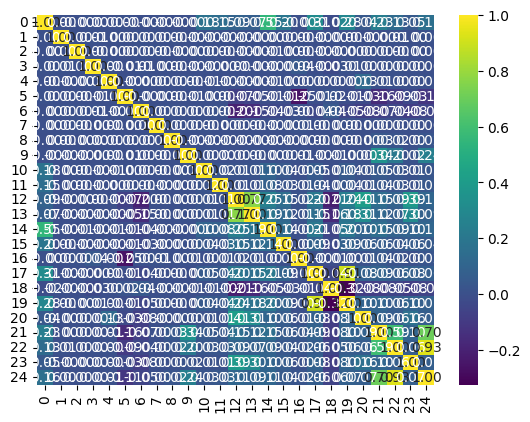

In [15]:
# Con la representación de vectores podemos calcular correlaciones
from pyspark.ml.stat import Correlation
import seaborn as sns
import matplotlib.pyplot as plt

pearson_matrix = Correlation.corr(vector_df, 'features').collect()[0][0]

sns.heatmap(pearson_matrix.toArray(), annot=True, fmt=".2f", cmap='viridis')

## Estandarización


In [16]:
from pyspark.ml.feature import StandardScaler

standard_scaler = StandardScaler(inputCol='features', outputCol='scaled')
scale_model = standard_scaler.fit(vector_df)

scaled_df = scale_model.transform(vector_df)
scaled_df.show()

+--------------------+------------------+--------------------+
|            features|diagnosed_diabetes|              scaled|
+--------------------+------------------+--------------------+
|[80.0,1.0,2.0,0.0...|                 1|[5.12669356558785...|
|[18.0,1.0,0.0,0.0...|                 1|[1.15350605225726...|
|[56.0,0.0,0.0,0.0...|                 0|[3.58868549591149...|
|[53.0,1.0,0.0,0.0...|                 0|[3.39643448720195...|
|[56.0,1.0,0.0,0.0...|                 0|[3.58868549591149...|
|[41.0,1.0,1.0,1.0...|                 0|[2.62743045236377...|
|[50.0,0.0,2.0,1.0...|                 0|[3.20418347849240...|
|[32.0,0.0,0.0,0.0...|                 1|[2.05067742623514...|
|[67.0,1.0,1.0,0.0...|                 1|[4.29360586117982...|
|[66.0,0.0,1.0,0.0...|                 1|[4.22952219160997...|
|[76.0,0.0,0.0,0.0...|                 1|[4.87035888730845...|
|[38.0,0.0,0.0,0.0...|                 0|[2.43517944365422...|
|[54.0,0.0,3.0,0.0...|                 1|[3.46051815677

In [17]:
from pyspark.ml.functions import vector_to_array
from pyspark.sql.functions import col

# Original feature names
feature_cols = ["age","gender_num", "ethnicity_num", "smoking_status_num",
                'alcohol_consumption_per_week','physical_activity_minutes_per_week',
                'diet_score','sleep_hours_per_day','screen_time_hours_per_day',
                'family_history_diabetes','hypertension_history','cardiovascular_history',
                'bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp','heart_rate',
                'cholesterol_total','hdl_cholesterol','ldl_cholesterol','triglycerides',
                'glucose_fasting','glucose_postprandial','insulin_level','hba1c']

# Convert vector column to array
scaled_array_df = scaled_df.withColumn("scaled_array", vector_to_array("scaled"))

# Create new columns for each scaled feature
for i, name in enumerate(feature_cols):
    scaled_array_df = scaled_array_df.withColumn(f"{name}_scaled", col("scaled_array")[i])

# Optionally, drop the intermediate array column
scaled_array_df = scaled_array_df.drop("scaled_array", "features", "scaled")

scaled_array_df.show()


+------------------+------------------+------------------+--------------------+-------------------------+-----------------------------------+-----------------------------------------+------------------+--------------------------+--------------------------------+------------------------------+---------------------------+-----------------------------+------------------+-------------------------+------------------+-------------------+------------------+------------------------+----------------------+----------------------+--------------------+----------------------+---------------------------+--------------------+------------------+
|diagnosed_diabetes|        age_scaled| gender_num_scaled|ethnicity_num_scaled|smoking_status_num_scaled|alcohol_consumption_per_week_scaled|physical_activity_minutes_per_week_scaled| diet_score_scaled|sleep_hours_per_day_scaled|screen_time_hours_per_day_scaled|family_history_diabetes_scaled|hypertension_history_scaled|cardiovascular_history_scaled|        bmi

In [18]:
scaled_array_df.printSchema()

root
 |-- diagnosed_diabetes: integer (nullable = true)
 |-- age_scaled: double (nullable = true)
 |-- gender_num_scaled: double (nullable = true)
 |-- ethnicity_num_scaled: double (nullable = true)
 |-- smoking_status_num_scaled: double (nullable = true)
 |-- alcohol_consumption_per_week_scaled: double (nullable = true)
 |-- physical_activity_minutes_per_week_scaled: double (nullable = true)
 |-- diet_score_scaled: double (nullable = true)
 |-- sleep_hours_per_day_scaled: double (nullable = true)
 |-- screen_time_hours_per_day_scaled: double (nullable = true)
 |-- family_history_diabetes_scaled: double (nullable = true)
 |-- hypertension_history_scaled: double (nullable = true)
 |-- cardiovascular_history_scaled: double (nullable = true)
 |-- bmi_scaled: double (nullable = true)
 |-- waist_to_hip_ratio_scaled: double (nullable = true)
 |-- systolic_bp_scaled: double (nullable = true)
 |-- diastolic_bp_scaled: double (nullable = true)
 |-- heart_rate_scaled: double (nullable = true)
 |

In [19]:
# Almacenar el conjunto de datos limpio en la base de datos
scaled_array_df \
    .write \
    .format("jdbc") \
    .mode('overwrite') \
    .option("url", "jdbc:postgresql://172.17.0.1:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "diabetes_scaled") \
    .save()

## Leer datos limpios y convertir a Vector Columna

In [20]:
# leer el conjunto de datos limpio en la base de datos

df_scaled = spark \
    .read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://172.17.0.1:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "diabetes_scaled") \
    .load()

df_scaled.show()

+------------------+------------------+------------------+--------------------+-------------------------+-----------------------------------+-----------------------------------------+------------------+--------------------------+--------------------------------+------------------------------+---------------------------+-----------------------------+------------------+-------------------------+------------------+-------------------+------------------+------------------------+----------------------+----------------------+--------------------+----------------------+---------------------------+--------------------+------------------+
|diagnosed_diabetes|        age_scaled| gender_num_scaled|ethnicity_num_scaled|smoking_status_num_scaled|alcohol_consumption_per_week_scaled|physical_activity_minutes_per_week_scaled| diet_score_scaled|sleep_hours_per_day_scaled|screen_time_hours_per_day_scaled|family_history_diabetes_scaled|hypertension_history_scaled|cardiovascular_history_scaled|        bmi

In [21]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder


# Define features and label
feature_cols = ["age_scaled","gender_num_scaled", "ethnicity_num_scaled", "smoking_status_num_scaled",
                'alcohol_consumption_per_week_scaled','physical_activity_minutes_per_week_scaled',
                'diet_score_scaled']

target = "diagnosed_diabetes"


df_scaled[feature_cols].show()


+------------------+------------------+--------------------+-------------------------+-----------------------------------+-----------------------------------------+------------------+
|        age_scaled| gender_num_scaled|ethnicity_num_scaled|smoking_status_num_scaled|alcohol_consumption_per_week_scaled|physical_activity_minutes_per_week_scaled| diet_score_scaled|
+------------------+------------------+--------------------+-------------------------+-----------------------------------+-----------------------------------------+------------------+
|  5.12669356558785|1.8571455790671603|  1.6091530176998678|                      0.0|                  2.115985984481127|                       1.8362826650355253|1.9090888447709553|
|1.1535060522572662|1.8571455790671603|                 0.0|                      0.0|                 1.4106573229874182|                       0.7345130660142101| 4.098926049067051|
| 3.588685495911495|               0.0|                 0.0|                    

In [22]:
# convertir datos a vector columna

from pyspark.ml.feature import VectorAssembler

# Lista de columnas escaladas

scaled_cols = ["age_scaled","gender_num_scaled", "ethnicity_num_scaled", "smoking_status_num_scaled",'alcohol_consumption_per_week_scaled','physical_activity_minutes_per_week_scaled','diet_score_scaled','sleep_hours_per_day_scaled','screen_time_hours_per_day_scaled','family_history_diabetes_scaled','hypertension_history_scaled','cardiovascular_history_scaled','bmi_scaled','waist_to_hip_ratio_scaled','systolic_bp_scaled','diastolic_bp_scaled','heart_rate_scaled','cholesterol_total_scaled','hdl_cholesterol_scaled','ldl_cholesterol_scaled','triglycerides_scaled','glucose_fasting_scaled','glucose_postprandial_scaled','insulin_level_scaled','hba1c_scaled']


# Crear VectorAssembler
assembler = VectorAssembler(inputCols=scaled_cols, outputCol="features")

# Transform el dataframe
vector_df = assembler.transform(df_scaled).select("features", "diagnosed_diabetes")

vector_df.show(truncate=False)


+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+
|features                                                                                                                                                                                                                                                                                                                                                                                                                           |diagnosed_diabetes|
+---------------------------------------------------------------------------------------------------------------------

## Entrenamiento de Modelos

### Modelo 1 LogisticRegression

In [23]:
# Entrenar con k fold

from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# dividir en entrenar / validar 
train_df, val_df = vector_df.randomSplit([0.8, 0.2], seed=42)

# === Modelo 1 regresion logistica  ===
lr = LogisticRegression(featuresCol="features", labelCol="diagnosed_diabetes")

# Grilla de Prametros
paramGrid_lr = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.01, 0.1, 0.5])
                .build())


# Funcion de evaluacion 
evaluator = BinaryClassificationEvaluator(labelCol="diagnosed_diabetes", metricName="areaUnderROC")

# validacion cruzada en 5 folds 
cv_lr = CrossValidator(estimator=lr,
                       estimatorParamMaps=paramGrid_lr,
                       evaluator=evaluator,
                       numFolds=5)

# Entramiento del modelo
cv_model_lr = cv_lr.fit(train_df)

# predicciones
predictions_lr = cv_model_lr.transform(val_df)

## area bajo la curva 

# AUC promedio por combinacion de parametros en los 5 folds
print("\n=== AUC por combinación de parámetros (5 folds) ===")
for i, avg in enumerate(cv_model_lr.avgMetrics):
    print(f"Combinación {i+1}: AUC promedio = {avg:.4f}")



=== AUC por combinación de parámetros (5 folds) ===
Combinación 1: AUC promedio = 0.9310
Combinación 2: AUC promedio = 0.9261
Combinación 3: AUC promedio = 0.9215


In [24]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluadores
multi_eval = MulticlassClassificationEvaluator(labelCol="diagnosed_diabetes")
binary_eval = BinaryClassificationEvaluator(labelCol="diagnosed_diabetes")

metrics = {
    "AUC ROC": binary_eval.evaluate(predictions_lr, {binary_eval.metricName: "areaUnderROC"}),
    "AUC PR": binary_eval.evaluate(predictions_lr, {binary_eval.metricName: "areaUnderPR"}),
    "Accuracy": multi_eval.setMetricName("accuracy").evaluate(predictions_lr),
    "Precision": multi_eval.setMetricName("weightedPrecision").evaluate(predictions_lr),
    "Recall": multi_eval.setMetricName("weightedRecall").evaluate(predictions_lr),
    "F1": multi_eval.setMetricName("f1").evaluate(predictions_lr)
}

print("\n=== Métricas de Validación (Logistic Regression) ===")
for k, v in metrics.items():
    print(f"{k:15s}: {v:.4f}")



=== Métricas de Validación (Logistic Regression) ===
AUC ROC        : 0.9330
AUC PR         : 0.9644
Accuracy       : 0.8573
Precision      : 0.8568
Recall         : 0.8573
F1             : 0.8566


In [25]:
print("\n=== Ejemplo de predicciones ===")
predictions_lr.select("probability", "prediction", "diagnosed_diabetes").show(10, truncate=False)



=== Ejemplo de predicciones ===


+------------------------------------------+----------+------------------+
|probability                               |prediction|diagnosed_diabetes|
+------------------------------------------+----------+------------------+
|[0.8267870216636184,0.1732129783363816]   |0.0       |0                 |
|[0.6579618875327726,0.3420381124672274]   |0.0       |0                 |
|[0.7134451490766466,0.2865548509233534]   |0.0       |0                 |
|[0.8524840084604843,0.14751599153951567]  |0.0       |0                 |
|[0.07307310727138852,0.9269268927286115]  |1.0       |1                 |
|[0.0045143154888024365,0.9954856845111976]|1.0       |1                 |
|[0.6318312784528621,0.36816872154713787]  |0.0       |0                 |
|[0.8224861922070752,0.1775138077929248]   |0.0       |0                 |
|[0.8690951732094818,0.13090482679051818]  |0.0       |0                 |
|[0.9281596072097482,0.07184039279025178]  |0.0       |0                 |
+------------------------

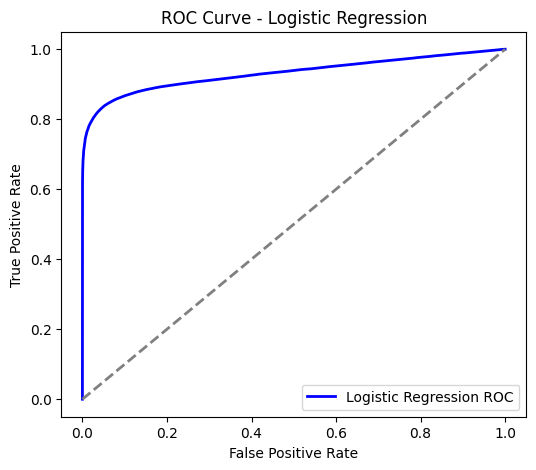

AUC ROC Logistic Regression: 0.9311


In [ ]:
from pyspark.ml.classification import LogisticRegression
import matplotlib.pyplot as plt

# ROC data de los resumen del entrenamiento
lr_model = cv_model_lr.bestModel  # mejor modelo de regessions de validacion cruzada
training_summary = lr_model.summary

# Obetenr puntos ROC 
roc = training_summary.roc.toPandas()  # Nos da FPR, TPR

# Plot ROC
plt.figure(figsize=(6,5))
plt.plot(roc['FPR'], roc['TPR'], color='blue', lw=2, label='Regression Logistic ROC')
plt.plot([0,1],[0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('Tasa de False Positivo')
plt.ylabel('Tase de Verdadero Positivo Rate')
plt.title('Curva ROC - Regression Logistica')
plt.legend(loc='lower right')
plt.show()

# AUC
auc_lr = training_summary.areaUnderROC
print(f"AUC ROC - Regression Logistica: {auc_lr:.4f}")


In [27]:
from pyspark.sql import functions as F
from pyspark.ml.linalg import DenseVector, SparseVector

# Extraer probabilidad de clase 1 si tu columna 'probability' es un vector
def extract_prob(v):
    if isinstance(v, (DenseVector, SparseVector)):
        return float(v[1])
    else:
        return float(v)

extract_prob_udf = F.udf(extract_prob, "double")

# Agregar columna de probabilidad escalar
predictions_lr_scalar = predictions_lr.withColumn("probability_1", extract_prob_udf(F.col("probability")))

# Seleccionar solo columnas escalares
cols_to_save = [c for c, t in predictions_lr_scalar.dtypes if t not in ('vector', 'struct')]

# Guardar en PostgreSQL, por ejemplo en tabla 'modelo_lr'
predictions_lr_scalar.select(cols_to_save) \
    .write \
    .format("jdbc") \
    .mode('overwrite') \
    .option("url", "jdbc:postgresql://172.17.0.1:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "modelo1") \
    .save()


In [28]:
# leer de la regresion logistica de la db 

df_modelo1 = spark \
    .read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://172.17.0.1:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "modelo1") \
    .load()

df_modelo1.show()

+------------------+----------+--------------------+
|diagnosed_diabetes|prediction|       probability_1|
+------------------+----------+--------------------+
|                 0|       0.0|  0.1732129783363816|
|                 0|       0.0|  0.3420381124672274|
|                 0|       0.0|  0.2865548509233534|
|                 0|       0.0| 0.14751599153951567|
|                 1|       1.0|  0.9269268927286115|
|                 1|       1.0|  0.9954856845111976|
|                 0|       0.0| 0.36816872154713787|
|                 0|       0.0|  0.1775138077929248|
|                 0|       0.0| 0.13090482679051818|
|                 0|       0.0| 0.07184039279025178|
|                 0|       0.0|0.011605093629409868|
|                 0|       0.0| 0.22934329958520716|
|                 0|       0.0| 0.07966291158705763|
|                 1|       1.0|  0.7949678153287695|
|                 1|       1.0|  0.9369579188617364|
|                 1|       1.0|  0.66698132395

## Modelo 2 RandomForestClassifier

In [29]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# === Modelo 2: Random Forest ===
rf = RandomForestClassifier(featuresCol="features", labelCol="diagnosed_diabetes", seed=42)

# Grilla de parámetros
paramGrid_rf = (ParamGridBuilder()
                .addGrid(rf.numTrees, [50, 100])
                .addGrid(rf.maxDepth, [5, 10])
                .build())

# Evaluador binario (AUC ROC)
evaluator = BinaryClassificationEvaluator(labelCol="diagnosed_diabetes", metricName="areaUnderROC")

# 5-Fold Cross Validation
cv_rf = CrossValidator(estimator=rf,
                       estimatorParamMaps=paramGrid_rf,
                       evaluator=evaluator,
                       numFolds=5,
                       parallelism=2)

# Entrenamiento del modelo
cv_model_rf = cv_rf.fit(train_df)

# Predicciones sobre validación
predictions_rf = cv_model_rf.transform(val_df)

print("\n=== AUC por combinación de parámetros (5 folds - Random Forest) ===")
for i, avg in enumerate(cv_model_rf.avgMetrics):
    print(f"Combinación {i+1}: AUC promedio = {avg:.4f}")



25/11/01 20:40:38 WARN DAGScheduler: Broadcasting large task binary with size 1487.1 KiB
25/11/01 20:40:42 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
25/11/01 20:40:47 WARN DAGScheduler: Broadcasting large task binary with size 3.8 MiB
25/11/01 20:40:53 WARN DAGScheduler: Broadcasting large task binary with size 2.7 MiB
25/11/01 20:41:15 WARN DAGScheduler: Broadcasting large task binary with size 1620.1 KiB
25/11/01 20:41:22 WARN DAGScheduler: Broadcasting large task binary with size 2.8 MiB
25/11/01 20:41:30 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/11/01 20:41:36 WARN DAGScheduler: Broadcasting large task binary with size 1045.4 KiB
25/11/01 20:41:39 WARN DAGScheduler: Broadcasting large task binary with size 7.6 MiB
25/11/01 20:41:47 WARN DAGScheduler: Broadcasting large task binary with size 1478.2 KiB
25/11/01 20:41:50 WARN DAGScheduler: Broadcasting large task binary with size 5.2 MiB
25/11/01 20:42:07 WARN DAGScheduler: Broad


=== AUC por combinación de parámetros (5 folds - Random Forest) ===
Combinación 1: AUC promedio = 0.9411
Combinación 2: AUC promedio = 0.9440
Combinación 3: AUC promedio = 0.9416
Combinación 4: AUC promedio = 0.9446


In [30]:
multi_eval = MulticlassClassificationEvaluator(labelCol="diagnosed_diabetes")
binary_eval = BinaryClassificationEvaluator(labelCol="diagnosed_diabetes")

metrics_rf = {
    "AUC ROC": binary_eval.evaluate(predictions_rf, {binary_eval.metricName: "areaUnderROC"}),
    "AUC PR": binary_eval.evaluate(predictions_rf, {binary_eval.metricName: "areaUnderPR"}),
    "Accuracy": multi_eval.setMetricName("accuracy").evaluate(predictions_rf),
    "Precision": multi_eval.setMetricName("weightedPrecision").evaluate(predictions_rf),
    "Recall": multi_eval.setMetricName("weightedRecall").evaluate(predictions_rf),
    "F1": multi_eval.setMetricName("f1").evaluate(predictions_rf)
}

print("\n=== Métricas de Validación (Random Forest) ===")
for k, v in metrics_rf.items():
    print(f"{k:15s}: {v:.4f}")


25/11/01 20:48:38 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB
25/11/01 20:48:42 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB
25/11/01 20:48:46 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB
25/11/01 20:48:49 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB
25/11/01 20:48:53 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB
25/11/01 20:48:56 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB



=== Métricas de Validación (Random Forest) ===
AUC ROC        : 0.9437
AUC PR         : 0.9709
Accuracy       : 0.9158
Precision      : 0.9259
Recall         : 0.9158
F1             : 0.9164


In [31]:
print("\n=== Ejemplo de predicciones (Random Forest) ===")
predictions_rf.select("probability", "prediction", "diagnosed_diabetes").show(20, truncate=False)



=== Ejemplo de predicciones (Random Forest) ===


25/11/01 20:49:00 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB


+------------------------------------------+----------+------------------+
|probability                               |prediction|diagnosed_diabetes|
+------------------------------------------+----------+------------------+
|[0.7833630983151978,0.21663690168480218]  |0.0       |0                 |
|[0.8572199228042351,0.14278007719576494]  |0.0       |0                 |
|[0.7927373125969833,0.20726268740301662]  |0.0       |0                 |
|[0.8417734682064361,0.15822653179356397]  |0.0       |0                 |
|[0.002934378573834105,0.997065621426166]  |1.0       |1                 |
|[0.0035269909226317824,0.9964730090773682]|1.0       |1                 |
|[0.8128774688700551,0.1871225311299448]   |0.0       |0                 |
|[0.8776434028155393,0.12235659718446061]  |0.0       |0                 |
|[0.860641580996096,0.13935841900390403]   |0.0       |0                 |
|[0.8697019396439862,0.1302980603560138]   |0.0       |0                 |
|[0.8979053458838611,0.10

25/11/01 20:49:03 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB


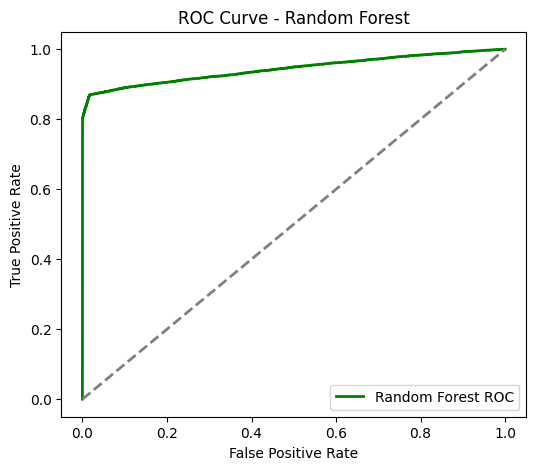

In [ ]:
from pyspark.ml.linalg import DenseVector, SparseVector
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# UDF para extraer la probablidad de la clase 1 1
def extract_prob(v):
    if isinstance(v, DenseVector) or isinstance(v, SparseVector):
        return float(v[1])
    else:
        return float(v)  # fallback si fuera necesario

extract_prob_udf = F.udf(extract_prob, "double")

# Dataframe con prob y label
prob_df = predictions_rf.withColumn(
    "prob",
    extract_prob_udf(F.col("probability"))
).select("prob", F.col("diagnosed_diabetes").alias("label"))

# Collect lista  
data = prob_df.collect()
probs = [row['prob'] for row in data]
labels = [row['label'] for row in data]

# Ordenar por probalidad descendiente 
sorted_pairs = sorted(zip(probs, labels), key=lambda x: x[0], reverse=True)

#  TPR y FPR
TP = FP = 0
P = sum(labels)
N = len(labels) - P
tpr = []
fpr = []

for prob, label in sorted_pairs:
    if label == 1:
        TP += 1
    else:
        FP += 1
    tpr.append(TP / P if P != 0 else 0)
    fpr.append(FP / N if N != 0 else 0)

# ROC curva
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='green', lw=2, label='Random Forest ROC')
plt.plot([0,1],[0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsp Positivo')
plt.ylabel('Tasa de Verdero Positivo')
plt.title('ROC Curva - Random Forest')
plt.legend(loc='lower right')
plt.show()



In [33]:
# Guardar predicciones de  Random Forest (modelo2) en la db 


from pyspark.sql import functions as F
from pyspark.ml.linalg import DenseVector, SparseVector

def extract_prob(v):
    if isinstance(v, DenseVector) or isinstance(v, SparseVector):
        return float(v[1])
    else:
        return float(v)

extract_prob_udf = F.udf(extract_prob, "double")

#  Añadir columna de probabilidad escalar
predictions_rf_scalar = predictions_rf.withColumn("probability_1", extract_prob_udf(F.col("probability")))

# Seleccionar columas escalartes (remueve 'features'y otros tipos de columnas)
cols_to_save = [c for c, t in predictions_rf_scalar.dtypes if t not in ('vector', 'struct')]


predictions_rf_scalar.select(cols_to_save) \
    .write \
    .format("jdbc") \
    .mode('overwrite') \
    .option("url", "jdbc:postgresql://172.17.0.1:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "modelo2") \
    .save()


25/11/01 20:49:08 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB


In [34]:
# leer predicciones de Random Forest (modelo2) en la db 

df_modelo2 = spark \
    .read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://172.17.0.1:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "modelo2") \
    .load()

df_modelo2.show()

+------------------+----------+-------------------+
|diagnosed_diabetes|prediction|      probability_1|
+------------------+----------+-------------------+
|                 0|       0.0|0.21663690168480218|
|                 0|       0.0|0.14278007719576494|
|                 0|       0.0|0.20726268740301662|
|                 0|       0.0|0.15822653179356397|
|                 1|       1.0|  0.997065621426166|
|                 1|       1.0| 0.9964730090773682|
|                 0|       0.0| 0.1871225311299448|
|                 0|       0.0|0.12235659718446061|
|                 0|       0.0|0.13935841900390403|
|                 0|       0.0| 0.1302980603560138|
|                 0|       0.0|0.10209465411613897|
|                 0|       0.0|0.20933590023819929|
|                 0|       0.0|0.17060799525392245|
|                 1|       1.0| 0.9694250126890234|
|                 1|       1.0| 0.9936169344952901|
|                 1|       1.0| 0.9447496314034486|
|           